#Bank Marketing Dataset-Capstone project

#Intoduction:
The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank. This dataset is having 17 columns like 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month','poutcome','Term_deposit','age','balance','day','duration','campaign', 'previous', 'pdays' and 'default'. Bank marketing is the practice of attracting and acquiring new customers through strategies, the use of these strategies helps determine what kind of customer is attracted to a certain institutions. Data analysts do all the analysis and provide a lead to increase the sales of the finacial institution using the information collected as a data from the respective finacial institutes.
##Objective:
The objective of the dataset is to get the data ready for applying it to Machine learning models to predict the driving force that attract more customers to get a term deposit.\
The aim of the project is to explore this dataset and find out factors that may improve the bank’s marketing strategies to attract more customers to get a term deposit also to perform specific analysis and to perform required data cleaning steps.\
There are 2 parts of the project. We have to perform required EDA steps with python and questions asked to perform SQL.

##Input variables:
   ### Bank client data:
    1) age (numeric)
    2) job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
    3) marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    4) education (categorical: "unknown","secondary","primary","tertiary")
    5) default: has credit in default? (binary: "yes","no")
    6) balance: average yearly balance, in euros (numeric) 
    7) housing: has housing loan? (binary: "yes","no")
    8) loan: has personal loan? (binary: "yes","no")
   ### Related with the last contact of the current campaign:
    9) contact: contact communication type (categorical: "unknown","telephone","cellular") 
    10) day: last contact day of the month (numeric)
    11) month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    12) duration: last contact duration, in seconds (numeric)
   ### Other attributes:
    13) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    14) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    15) previous: number of contacts performed before this campaign and for this client (numeric)
    16) poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ### Output variable (desired target):
    17) y - has the client subscribed a term deposit? (binary: "yes","no")

##Installing required libraries

We start by installing the required libraries like NumPy, Pandas, Matplotlib, Seaborn, preprocessing, stats, missingo and simpleImputer

In [1]:
import numpy as np                     # Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from scipy import stats

##Readig the uploaded file
We read the files using pandas

In [ ]:
A1 = pd.read_csv('bank.csv', sep=';')
A2 = pd.read_csv('bank-full.csv', sep=';')
A = pd.concat([A1,A2],ignore_index=True)
A.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


##Part 1 - EDA steps with python


###Performing basic exploration of data.
Finding the number of rows and columns:

In [ ]:
print("Number of rows:",A.shape[0],"\n""Number of clomns:",A.shape[1])    #Number of rows & columns

Number of rows: 49732 
Number of clomns: 17


Looking at the names of the Columns:

In [ ]:
A.columns     #Finding column names

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Looking at the Data structure

In [ ]:
A.info()           #getting the info of the dataset, like null values and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [ ]:
df = A.astype({'job':'category','marital':'category','education':'category','marital':'category','default':'category', 'housing':'category', 'loan':'category', 'contact':'category', 'month':'category','poutcome':'category','y':'category'}) #converting the data type to correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        49732 non-null  int64   
 1   job        49732 non-null  category
 2   marital    49732 non-null  category
 3   education  49732 non-null  category
 4   default    49732 non-null  category
 5   balance    49732 non-null  int64   
 6   housing    49732 non-null  category
 7   loan       49732 non-null  category
 8   contact    49732 non-null  category
 9   day        49732 non-null  int64   
 10  month      49732 non-null  category
 11  duration   49732 non-null  int64   
 12  campaign   49732 non-null  int64   
 13  pdays      49732 non-null  int64   
 14  previous   49732 non-null  int64   
 15  poutcome   49732 non-null  category
 16  y          49732 non-null  category
dtypes: category(10), int64(7)
memory usage: 3.1 MB


Renaming the column with proper names

In [ ]:
df=df.rename(columns={'y':'Term_deposit'})    #Renaming the columns with rename function
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.isnull().sum()  #To find number of missing values

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
Term_deposit    0
dtype: int64

In [ ]:
df.duplicated().sum()   #To check duplicates in data

4521

In [ ]:
df = df.drop_duplicates()                 #dfroping all the duplicates in data (We can clearly see that Bank.csv is a sub file of bank-full.csv)
print("Number of rows:",df.shape[0],"\n""Number of clomns:",df.shape[1])    #Number of rows & columns

Number of rows: 45211 
Number of clomns: 17


In [ ]:
df.nunique()     #To find number of unique values

age               77
job               12
marital            3
education          4
default            2
balance         7168
housing            2
loan               2
contact            3
day               31
month             12
duration        1573
campaign          48
pdays            559
previous          41
poutcome           4
Term_deposit       2
dtype: int64

In [ ]:
df['job'].unique() #getting the unique values of the column job

['unemployed', 'services', 'management', 'blue-collar', 'self-employed', ..., 'admin.', 'student', 'housemaid', 'retired', 'unknown']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']

In [ ]:
df['education'].unique() #getting the unique values of the column education

['primary', 'secondary', 'tertiary', 'unknown']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']

In [ ]:
df['contact'].unique() #getting the unique values of the column contact

['cellular', 'unknown', 'telephone']
Categories (3, object): ['cellular', 'telephone', 'unknown']

In [ ]:
df['job'] = df['job'].replace('unknown',np.NaN)                   #replace method is used to replace unknown with NAN
df['education'] = df['education'].replace('unknown',np.NaN)
df['contact'] = df['contact'].replace('unknown',np.NaN)

Replacing the unknown data of job with NaN as all other data are metioned even unemployed is mentioned hence there cannot be a unknown categary hence replaced with NaN, similarly in education there are three levels of education and unknown category is replaced with NaN and in Contact there are two modes of comunication that is Cellular and Telephone considering these two as important modes of contacting the customers Unknown column is replaced with NaN.

Getting numerical Discriptive Stats.

In [ ]:
df.describe() #describe() method is used to get some statistical data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.isnull().sum()   #To find number of missing values

age                 0
job               288
marital             0
education        1857
default             0
balance             0
housing             0
loan                0
contact         13020
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
Term_deposit        0
dtype: int64

In [ ]:
df.isnull().mean() * 100  # finding the percentage of missing values.

age              0.000000
job              0.637013
marital          0.000000
education        4.107407
default          0.000000
balance          0.000000
housing          0.000000
loan             0.000000
contact         28.798301
day              0.000000
month            0.000000
duration         0.000000
campaign         0.000000
pdays            0.000000
previous         0.000000
poutcome         0.000000
Term_deposit     0.000000
dtype: float64

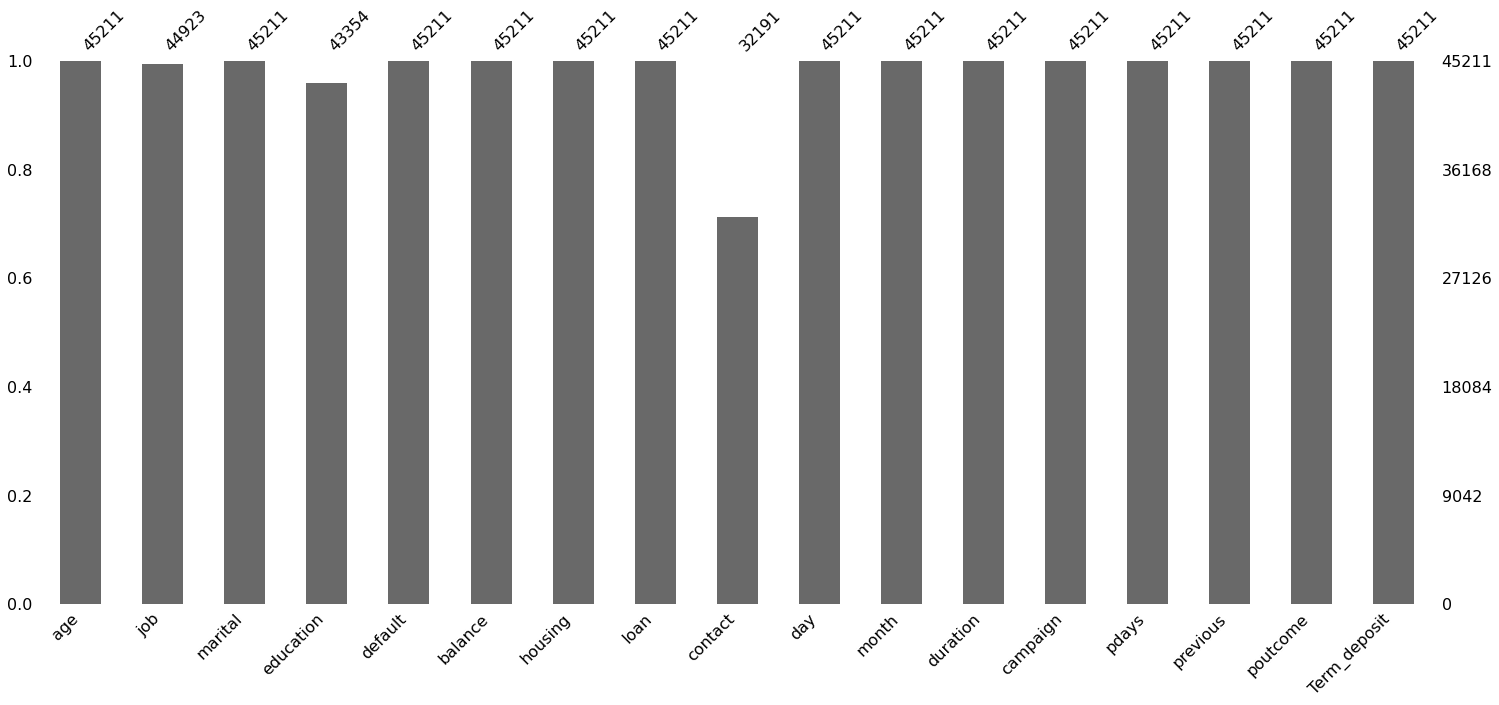

In [ ]:
msno.bar(df) # Visulaizing the missing values

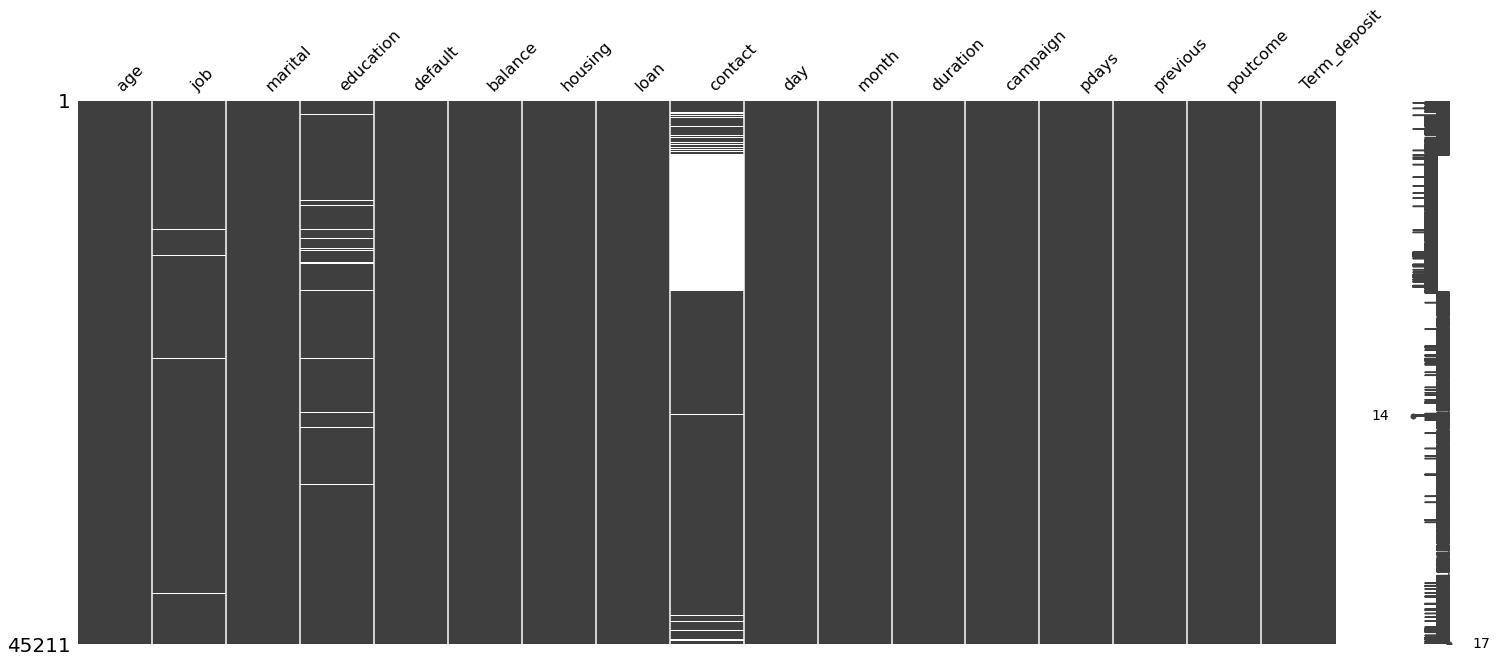

In [ ]:
msno.matrix(df) #ploting the graph to view the positons of missing values

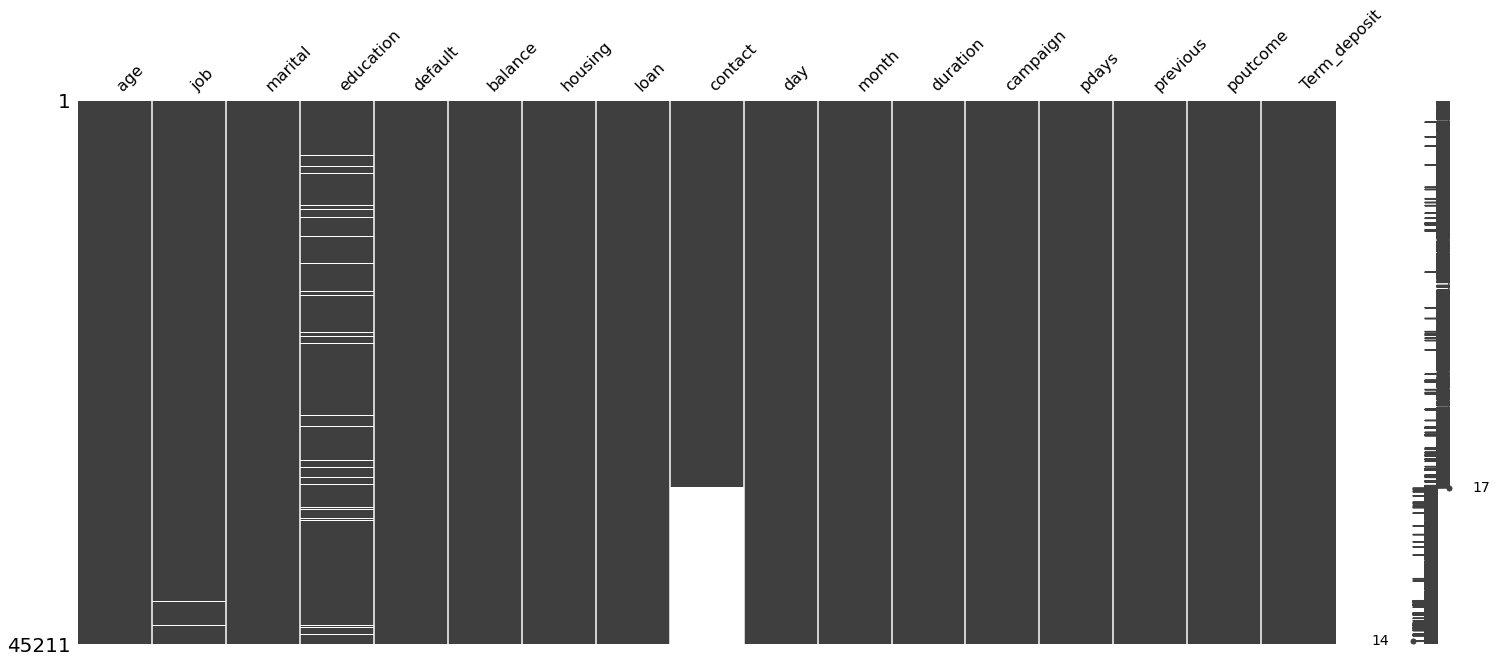

In [ ]:
sorted = df.sort_values('contact')      # Sorting the contact column and ploting matrix plot using nsno
msno.matrix(sorted)

Drawing the msno matrix map to find the relation between the missig values, we can see a slight relation between job and contact. Let us analyse in detail with heatmap

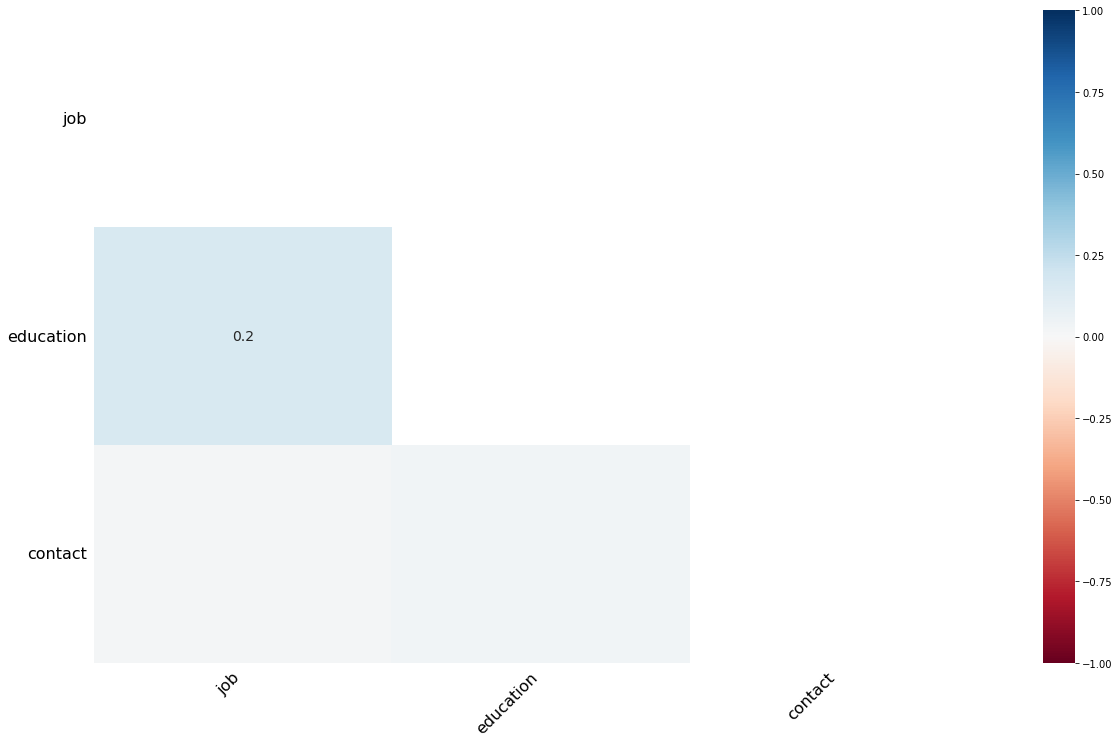

In [ ]:
msno.heatmap(df) # Heatmap graph ussing missingno

From the above heatmap we can clearly say that there is no relationship between the missing values.

In [ ]:
df=df.dropna(subset=['job'])    #dfroping the rows of missing values in job Columns using dropna()

Droping the missing job rows as the missing data is too low (0.63%) compared to the raw data.

In [ ]:
print("Number of rows:",df.shape[0],"\n""Number of clomns:",df.shape[1])    #Number of rows & columns

Number of rows: 44923 
Number of clomns: 17


In [ ]:
df['education'] = df.education.map({'primary':0, 'secondary':1, 'tertiary':2})          #mapping catogerical data with numerical data
df['contact'] = df.contact.map({'cellular':0, 'telephone':1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_deposit
0,30,unemployed,married,0,no,1787,no,no,0,19,oct,79,1,-1,0,unknown,no
1,33,services,married,1,no,4789,yes,yes,0,11,may,220,1,339,4,failure,no
2,35,management,single,2,no,1350,yes,no,0,16,apr,185,1,330,1,failure,no
3,30,management,married,2,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,1,no,0,yes,no,NaN,5,may,226,1,-1,0,unknown,no


Chainging the categorical to numerical in order to find mean, median, mode which suits the best for replcing.

In [ ]:
#When I tried to use KNN impute I got an error 'Your session crashed after using all available RAM'
df['education'].fillna(df['education'].mode()[0], inplace=True)      #Filling the mising values with mode using fillna
df['contact'].fillna(df['contact'].mode()[0], inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_deposit
0,30,unemployed,married,0,no,1787,no,no,0,19,oct,79,1,-1,0,unknown,no
1,33,services,married,1,no,4789,yes,yes,0,11,may,220,1,339,4,failure,no
2,35,management,single,2,no,1350,yes,no,0,16,apr,185,1,330,1,failure,no
3,30,management,married,2,no,1476,yes,yes,0,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,1,no,0,yes,no,0,5,may,226,1,-1,0,unknown,no


Replacing both the columns missing data with mode as it is the best techinique to fill the missing Data of a categorical data set.

In [ ]:
df['education'] = df.education.map({0:'primary', 1:'secondary', 2:'tertiary'})       #chainging the numerical back to catogerical as the replacement is done.
df['contact'] = df.contact.map({0:'cellular', 1:'telephone'})

In [ ]:
D = df.copy(deep=True)           # Using copy function to copy the data
D.head()                         # Using head() to view first 5 rows of data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,unknown,no


Copying the dataset to a new variable

Drawing Distribution plot:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

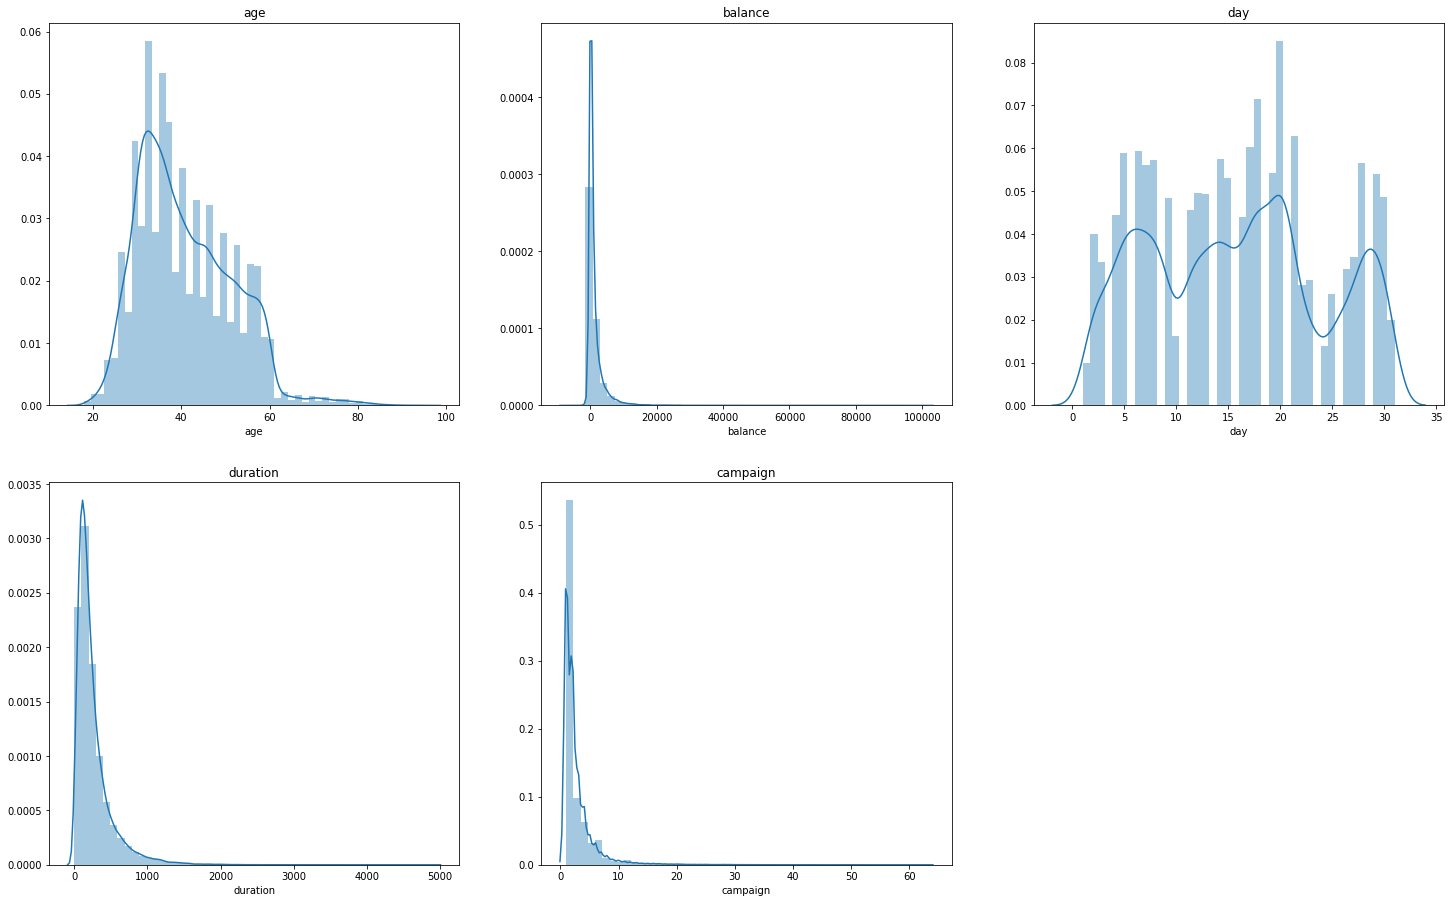

In [ ]:
num_columns = ['age','balance','day','duration','campaign']
plt.figure(figsize=(25,100), facecolor ='white')
counter = 1
for i in num_columns:                     # using for loop and subplot to draw multiple graphs
  ax = plt.subplot(12,3,counter)
  sns.distplot(D[i])                       # Drawing distribution plot using seaborn library.
  plt.xlabel(i)                           # using xlabel to label the graph
  plt.ylabel('')
  plt.title(i)                            # using title to provide title for each graph
  counter += 1
plt.show()

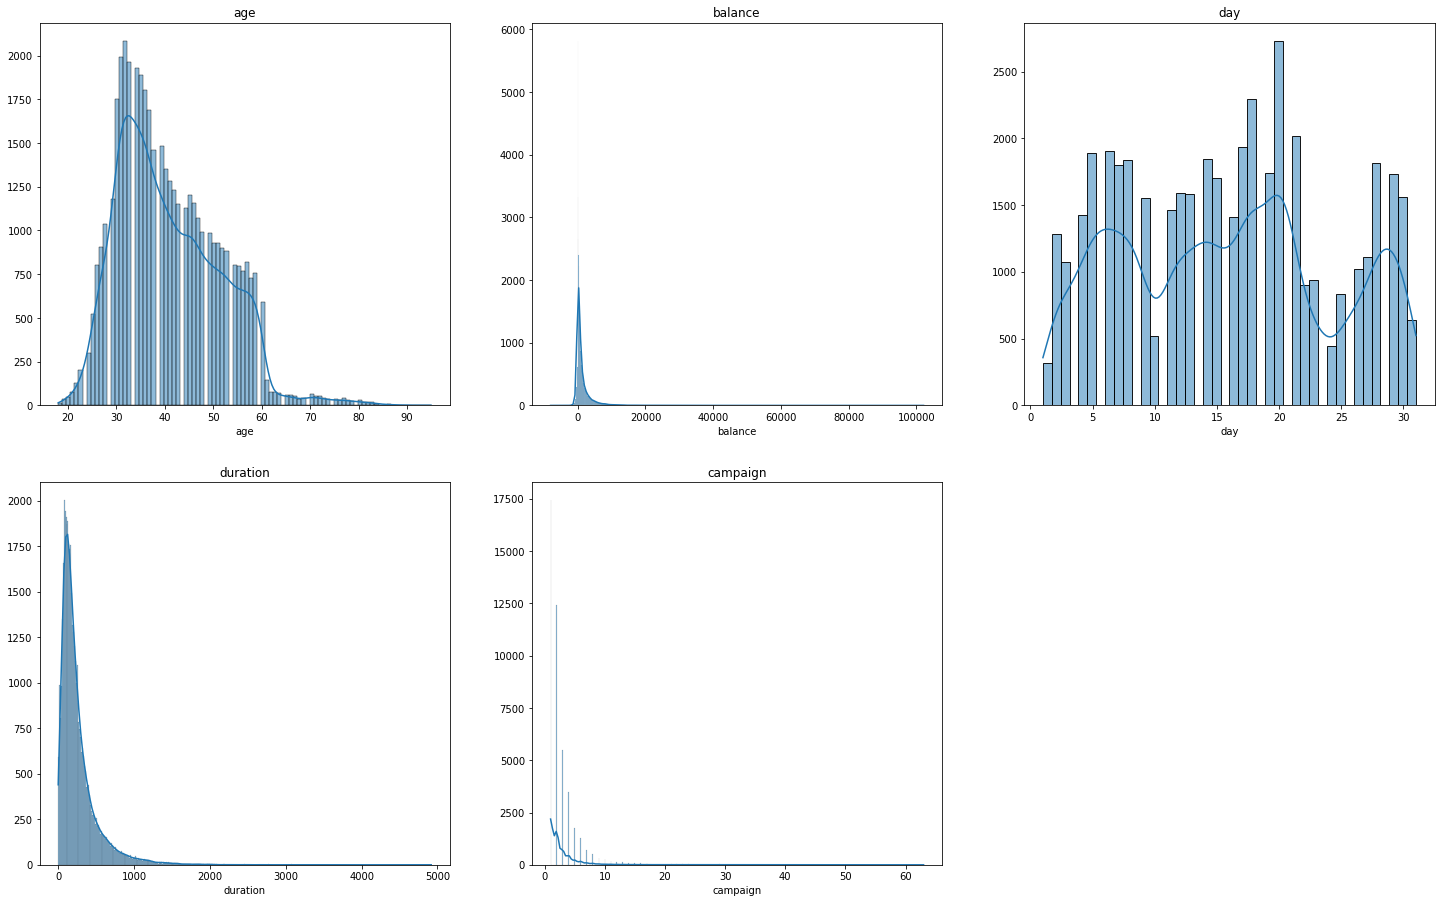

In [ ]:
num_columns = ['age','balance','day','duration','campaign']
plt.figure(figsize=(25,100), facecolor ='white')
counter = 1
for i in num_columns:                                   # using for loop and subplot to draw multiple graphs
  ax = plt.subplot(12,3,counter) 
  sns.histplot(data=D[i], kde=True)                     # Drawing hist plot using seaborn library.
  plt.xlabel(i)
  plt.ylabel('')
  plt.title(i)
  counter += 1
plt.show()

In [ ]:
B = D.drop(columns=['pdays','previous'])
B.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age         0.689220
balance     8.390123
day         0.092195
duration    3.147755
campaign    4.911021
dtype: float64

From the above two graphs and the skewness value obtained above we can clearly say that balance, duration, campaign are highly skewed data.

In [ ]:
def outliers(df,*var):                         #defining a function called Outliers
    for i in var:
        plt.figure(figsize=(10,6))
        plt.title(f'Outliers in {i}', fontsize=15)   #drawing the required plot by defining a function.
        sns.boxplot(data= df, x=i)
        plt.show()
        print()
        q1,q2 = np.percentile(df[i],(25,75))
        IQR = q2 -q1                                   #Calculating IQR
        Max = q2 + 1.5 * IQR
        Min = q1 - 1.5 * IQR
        Outlayer = df[(df[i]<Min) | (df[i]>Max)]
        print(f'Outliers in {i}: ', round(Outlayer.shape[0]/df.shape[0]*100,2),'%')   #Calculating the % of outlayer. 
        print()

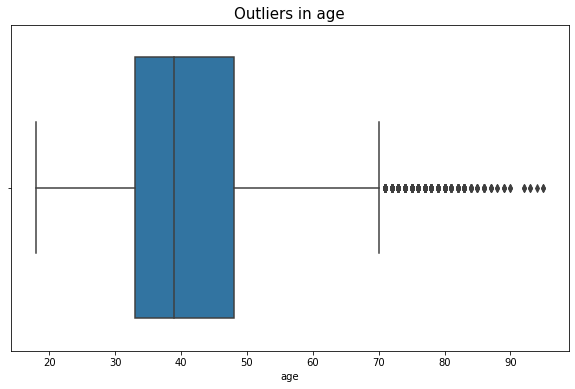


Outliers in age:  1.07 %



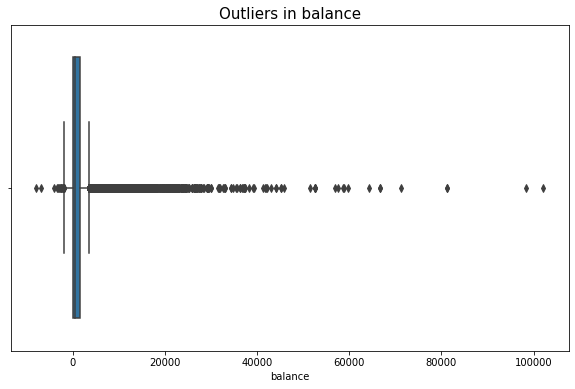


Outliers in balance:  10.49 %



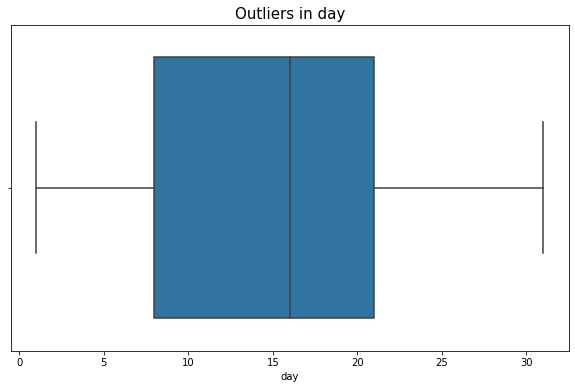


Outliers in day:  0.0 %



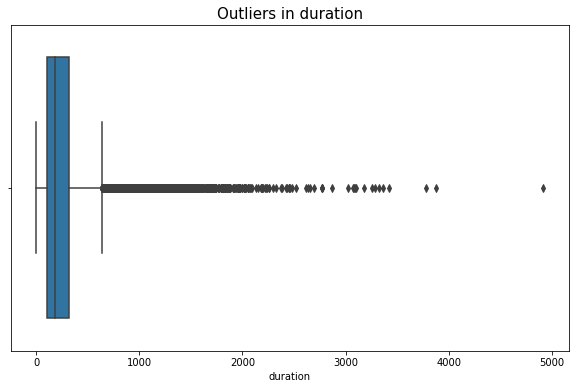


Outliers in duration:  7.16 %



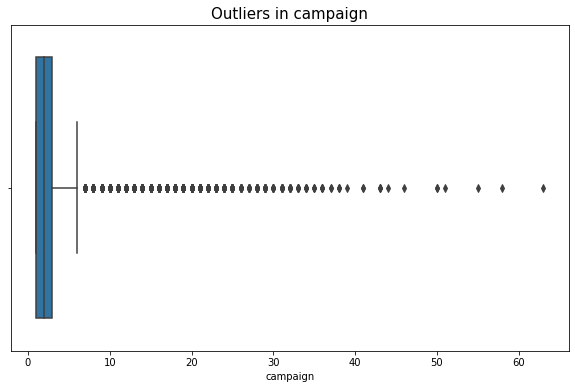


Outliers in campaign:  6.75 %



In [ ]:
outliers(D,'age','balance','day','duration','campaign')    # Calling the above defined function to get the results.

From the above we can clearly see the outliers as well as percentage of outliers, balance column has the highest outliers.

#Handling Outliers 1st approach:

Using IQR method to remove the outliers

In [ ]:
num_columns = ['age','balance','day','duration','campaign']
for i in num_columns:                            #using for loop to remove outliers in each column using IQR method
  Q1 = D[i].quantile(0.25)
  Q3 = D[i].quantile(0.75)
  IQR = Q3 - Q1                                   #Calculating IQR
  w = 1.5  
  lower = Q1 -(w*IQR)
  upper = Q3 + (w*IQR)
  D[i]=np.where(D[i]>upper,upper,np.where(D[i]<lower,lower,D[i]))    #appending the values after removing the outliers 

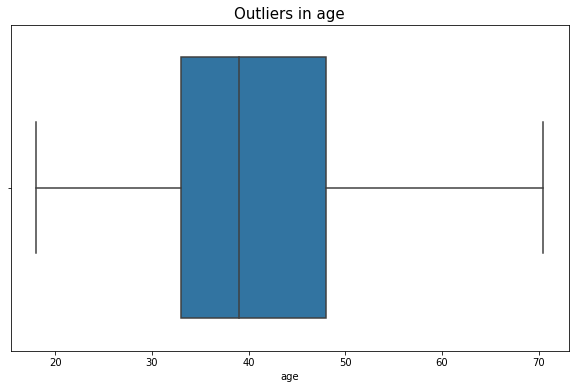


Outliers in age:  0.0 %



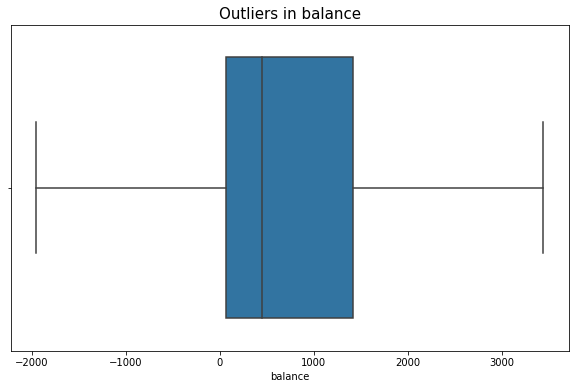


Outliers in balance:  0.0 %



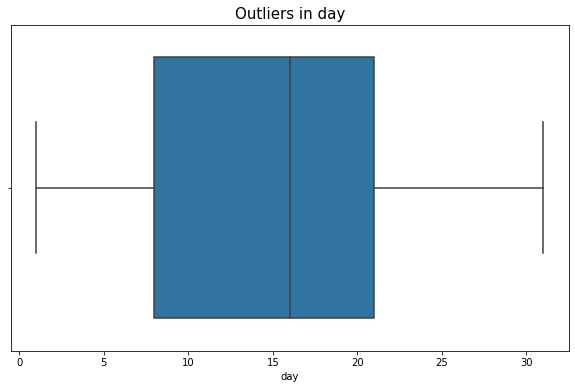


Outliers in day:  0.0 %



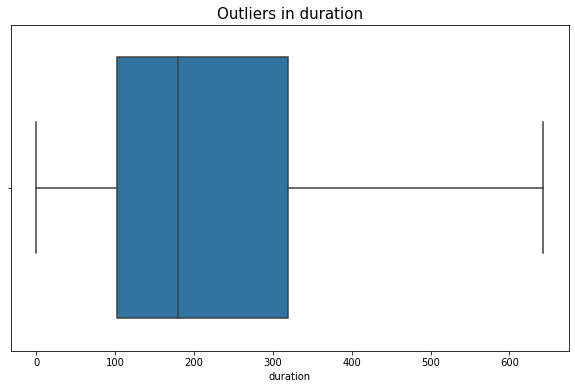


Outliers in duration:  0.0 %



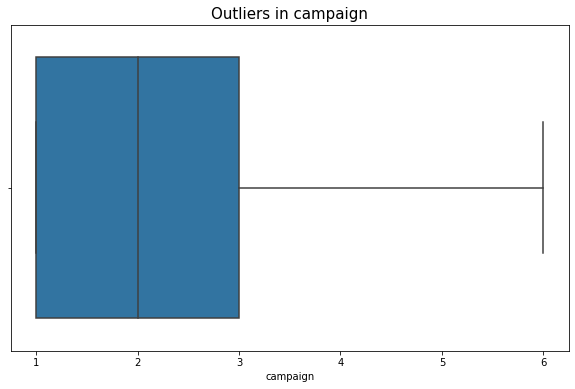


Outliers in campaign:  0.0 %



In [ ]:
outliers(D,'age','balance','day','duration','campaign')       # Calling the above defined function to get the results.

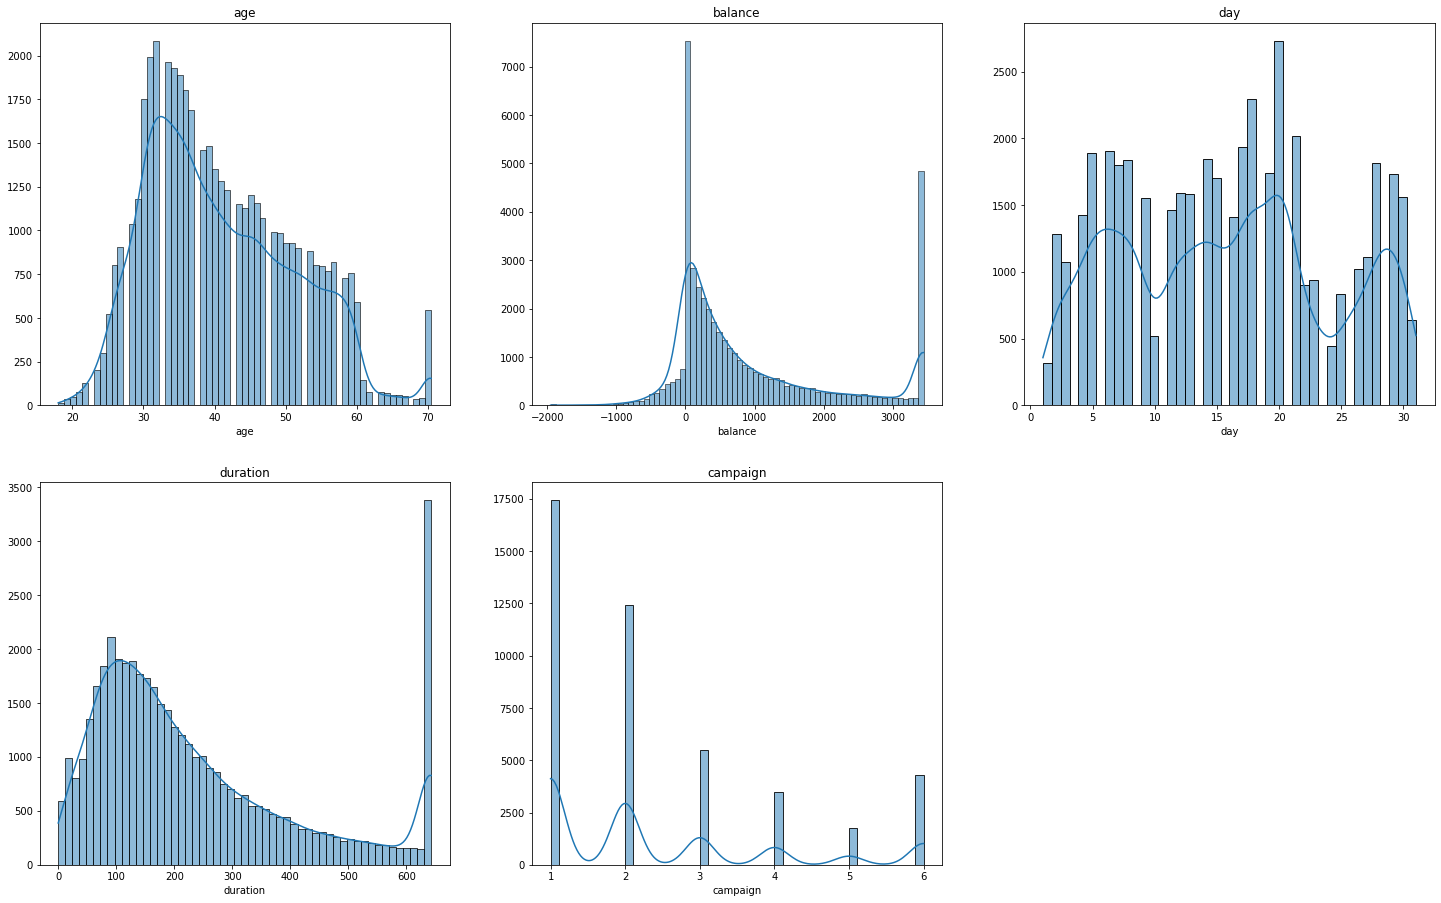

In [ ]:
num_columns = ['age','balance','day','duration','campaign']
plt.figure(figsize=(25,100), facecolor ='white')
counter = 1
for i in num_columns:
  ax = plt.subplot(12,3,counter)                     #ploting the graph after removing the outliers
  sns.histplot(data=D[i], kde=True)                  # Drawing histplot using seaborn
  plt.xlabel(i)
  plt.ylabel('')                                     # using ylable to make label on y axis blank
  plt.title(i)
  counter += 1
plt.show()

The data after removal of outliers is somewhat normal

In [ ]:
B = D.drop(columns=['pdays','previous'])
B.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age         0.533985
balance     1.094728
day         0.092195
duration    1.037786
campaign    1.100908
dtype: float64

We can clearly see the reduction in skewness values after removing outliers, still the data is moderately skewed with balance, duration and compaign skewness is nearly 1.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.3868950011675217


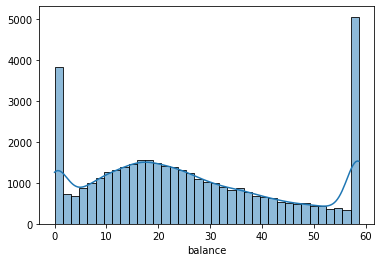

In [ ]:
c = np.sqrt(B['balance'])                    # Using sqrt transform to remove skewness 
print(c.skew())
sns.histplot(data=pd.Series(c), kde=True)    # Drawing histplot to check the distribution after transform.
plt.xlabel('balance')                        # Using xlabel to give label to the graph
plt.ylabel('')
plt.show()

From the above plot we can see that the data is almost normaly distributed

0.3788923682106998


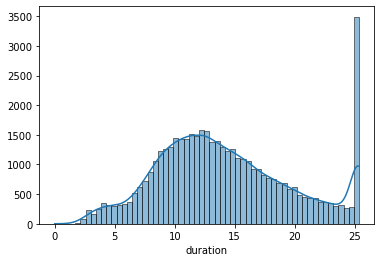

In [ ]:
c = np.sqrt(B['duration'])                                  # Using sqrt transform to remove skewness 
c.skew()
print(c.skew())
sns.histplot(data=pd.Series(c), kde=True)                    # Drawing histplot to check the distribution after transform.
plt.xlabel('duration')                                        # Using xlabel to give label to the graph
plt.ylabel('')
plt.show()

From the above plot we can see that the data is almost normaly distributed

0.1188488316602594


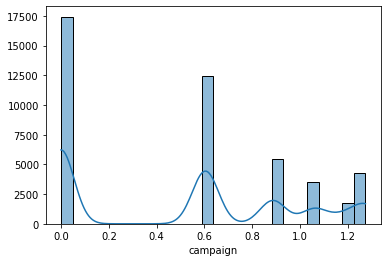

In [ ]:
b = stats.boxcox(B['campaign'])[0]                                  # Using boxcox transform to remove skewness 
print(pd.Series(b).skew())
sns.histplot(data=pd.Series(b), kde=True)                         # Drawing histplot to check the distribution after transform.
plt.xlabel('campaign')
plt.ylabel('')
plt.show()

Using boxcox transform as the data campaign doesnot have any negative values.

In [ ]:
D.to_csv('BANK.csv', index=False, header=True)     #Exporting the cleaned data as CSV file to use in MYSQL 

#Handling Outliers 2nd approach

In [ ]:
d = df.copy(deep=True)                 # Using copy function to copy the data
d.head()                              # Using head() to view first 5 rows of data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,unknown,no


Copying the dataset to a new variable

In [ ]:
d.groupby(['Term_deposit','default']).size()      #using group by funtion to group the column according to term deposit

Term_deposit  default
no            no         38907
              yes          761
yes           no          5203
              yes           52
dtype: int64

From the above result we can clearly see that for most of the Term deposit data default creidit is no, so we can infer that default does not play significant role in this data so we can drop it from the dataset.

In [ ]:
d=d.drop(columns='default', axis=1)                     # droping default column using drop as it is insignificant.

In [ ]:
d.groupby(['Term_deposit','pdays']).size()                           #using group by funtion to group the column according to term deposit

Term_deposit  pdays
no            -1       33333
               1           9
               2          35
               3           1
               4           1
                       ...  
yes            838         0
               842         1
               850         0
               854         1
               871         0
Length: 1116, dtype: int64

From the above result we can clearly see more than 70% of the data of pdays is with -1 (considering -1 as client was not previously contacted as 999 is not provided in the data) hence pdays also doesn't play significant role in this dataset, so we can drop this column.

In [ ]:
d=d.drop(columns='pdays', axis=1)                                  # droping pdays column using drop as it is insignificant.

In [ ]:
d.groupby(['Term_deposit','age'], sort= True).size()                #using group by funtion to group the column according to term deposit

Term_deposit  age
no            18      5
              19     24
              20     35
              21     57
              22     89
                     ..
yes           90      2
              92      2
              93      2
              94      0
              95      1
Length: 154, dtype: int64

Here outliers can be ignored as it is common to observe age group ranging from 18 to 95

In [ ]:
d.groupby(['Term_deposit','balance'], sort= True)['balance'].count()           #using group by funtion to group the column according to term deposit

Term_deposit  balance
no            -8019      1
              -6847      1
              -4057      1
              -3372      1
              -3313      1
                        ..
yes            66721     0
               71188     0
               81204     2
               98417     0
               102127    0
Name: balance, Length: 14284, dtype: int64

Here we can see that balance is ranging from -ve value to +ve value which is proper and it is interesting to observe that some of the people with high +ve balance have not opted for Term deposit, so we shall not remove any outliers from this column.

In [ ]:
d.groupby(['Term_deposit','duration'], sort= True)['duration'].count()              #using group by funtion to group the column according to term deposit

Term_deposit  duration
no            0            3
              1            2
              2            3
              3            4
              4           15
                          ..
yes           3366         0
              3422         0
              3785         0
              3881         1
              4918         0
Name: duration, Length: 3142, dtype: int64

From the above result we can observe that as the duration is less most of the users are not opting term deposit and as duration increasing some users have opted term deposit, so we shall not remove any outliers from this column.

In [ ]:
d.groupby(['Term_deposit','campaign'], sort= True)['campaign'].count()                  #using group by funtion to group the column according to term deposit

Term_deposit  campaign
no            1           14896
              2           11043
              3            4873
              4            3187
              5            1610
                          ...  
yes           50              0
              51              0
              55              0
              58              0
              63              0
Name: campaign, Length: 96, dtype: int64

From the above result we can see that as the campaign increasing the number of term deposit also seems increasing, so we shall not remove any outliers from this column.

In [ ]:
d.groupby(['Term_deposit','previous'], sort= True)['previous'].count()                       #using group by funtion to group the column according to term deposit

Term_deposit  previous
no            0           33333
              1            2184
              2            1645
              3             847
              4             541
                          ...  
yes           41              0
              51              0
              55              1
              58              1
              275             0
Name: previous, Length: 82, dtype: int64

From the above we can see that since most contacts performed before this campaign and for this client that is more than 70% of the data of previous lies with no in term deposit it doesn't play significant role in this dataset, so we can drop this column.

In [ ]:
d=d.drop(columns='previous', axis=1)                  # droping previous column using drop as it is insignificant.

In [ ]:
d.head()              # Using head() to view first 5 rows of data

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,Term_deposit
0,30,unemployed,married,primary,1787,no,no,cellular,19,oct,79,1,unknown,no
1,33,services,married,secondary,4789,yes,yes,cellular,11,may,220,1,failure,no
2,35,management,single,tertiary,1350,yes,no,cellular,16,apr,185,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,cellular,3,jun,199,4,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,cellular,5,may,226,1,unknown,no


In [ ]:
d.to_csv('BANK1.csv', index=False)               #Exporting the cleaned data as CSV file to use in MYSQL 

We shall continue with the data corresponding to 2nd approach of handling outliers as it looks promissing and more relevent.

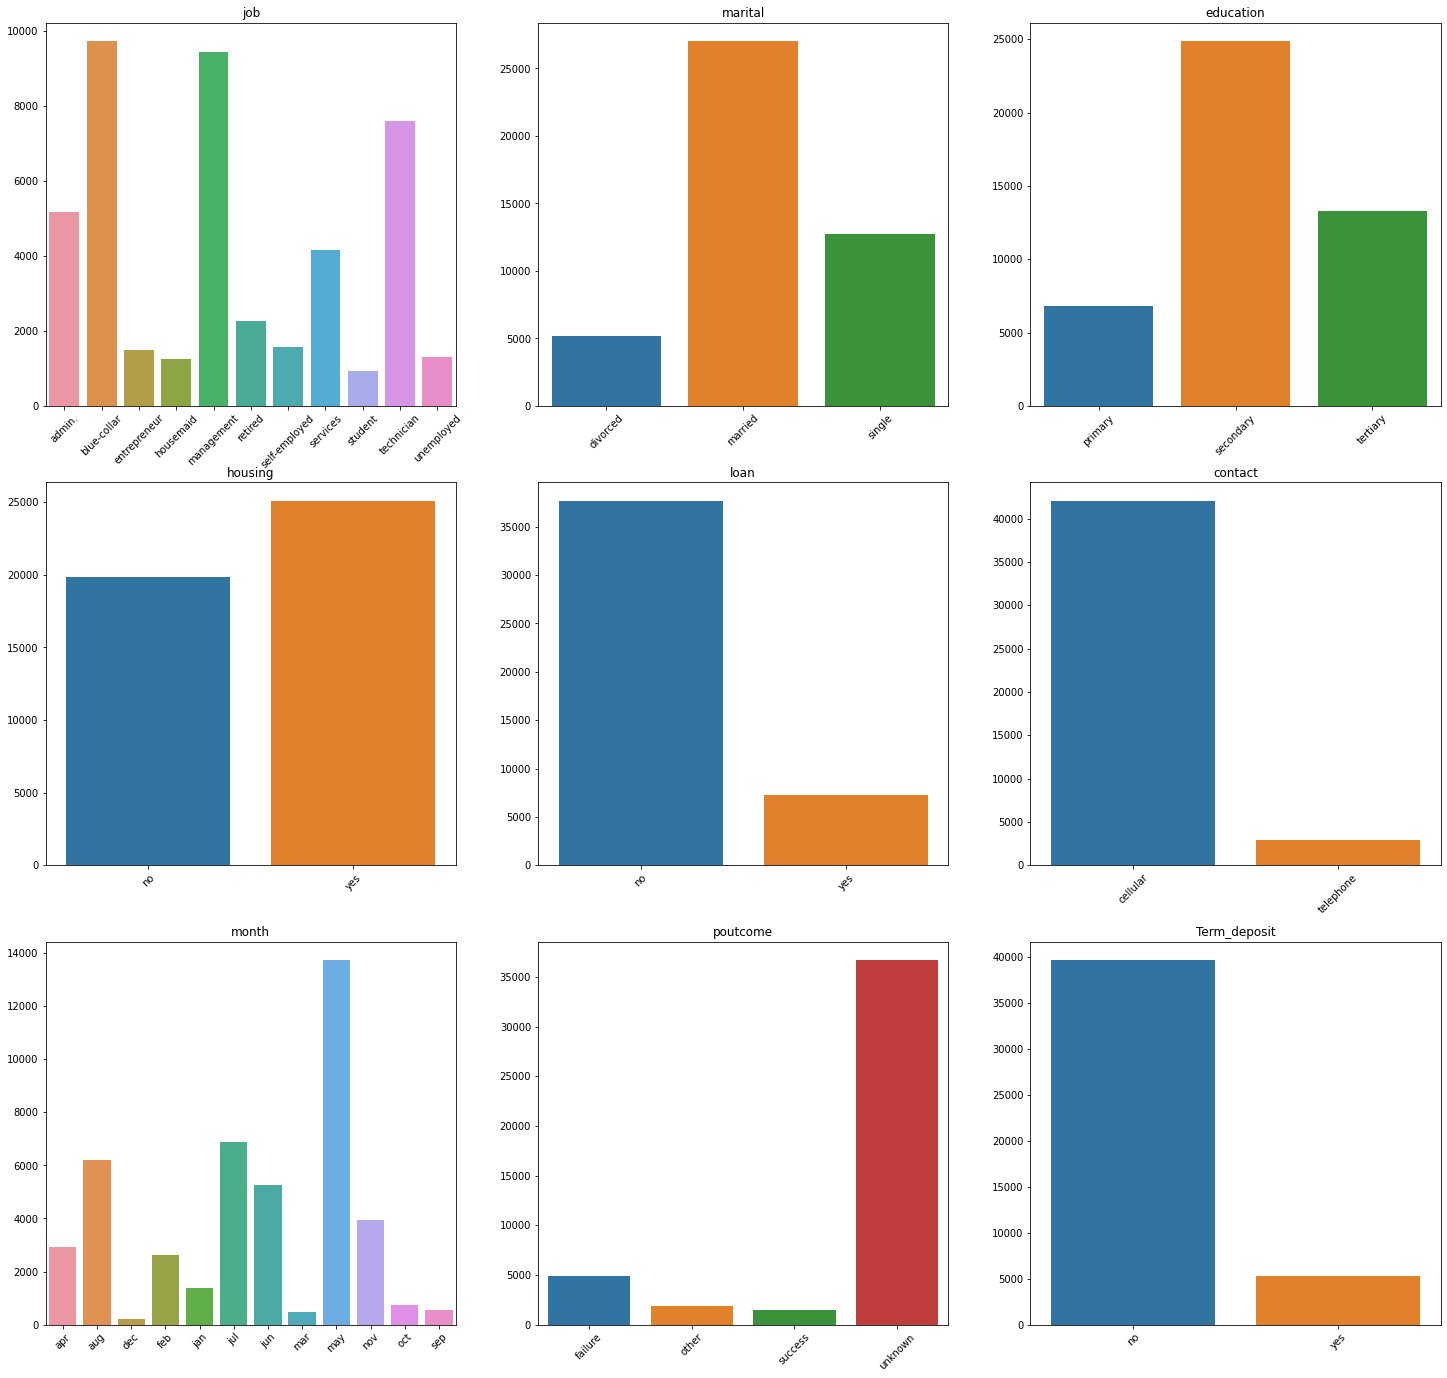

In [ ]:
cat_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month','poutcome','Term_deposit']
plt.figure(figsize=(25,100), facecolor ='white')
counter = 1
for i in cat_columns:                              # using for loop and subplot to draw multiple graphs
  ax = plt.subplot(12,3,counter)
  sns.countplot(x=i, data = d)                     # Drawing count plot using seaborn library.
  plt.xlabel('')
  plt.xticks(rotation=45)                          # Rotating the colmn names in the graph by 45 deg
  plt.ylabel('')
  plt.title(i)                                      # Giving the title for the graphs
  counter += 1
plt.show()

From the above graps we can infer that:
> Users with blue collar jobs are more in this dataset.

> Users who's marital status is Married are more in this Dataset.

> Users with education level of secondary are more in this dataset.

> Users with housing loans are slightly higher in this dataset.

> Users with no personal loans are high in this dataset.

> Users are more contacted through cellular in this datasset.

> Most of the users were contacted last in the month of May.

> Most of the outcome of previous marketing campaign is Unknown.

> Most of the users in this dataset have not subscribed to term deposit. 

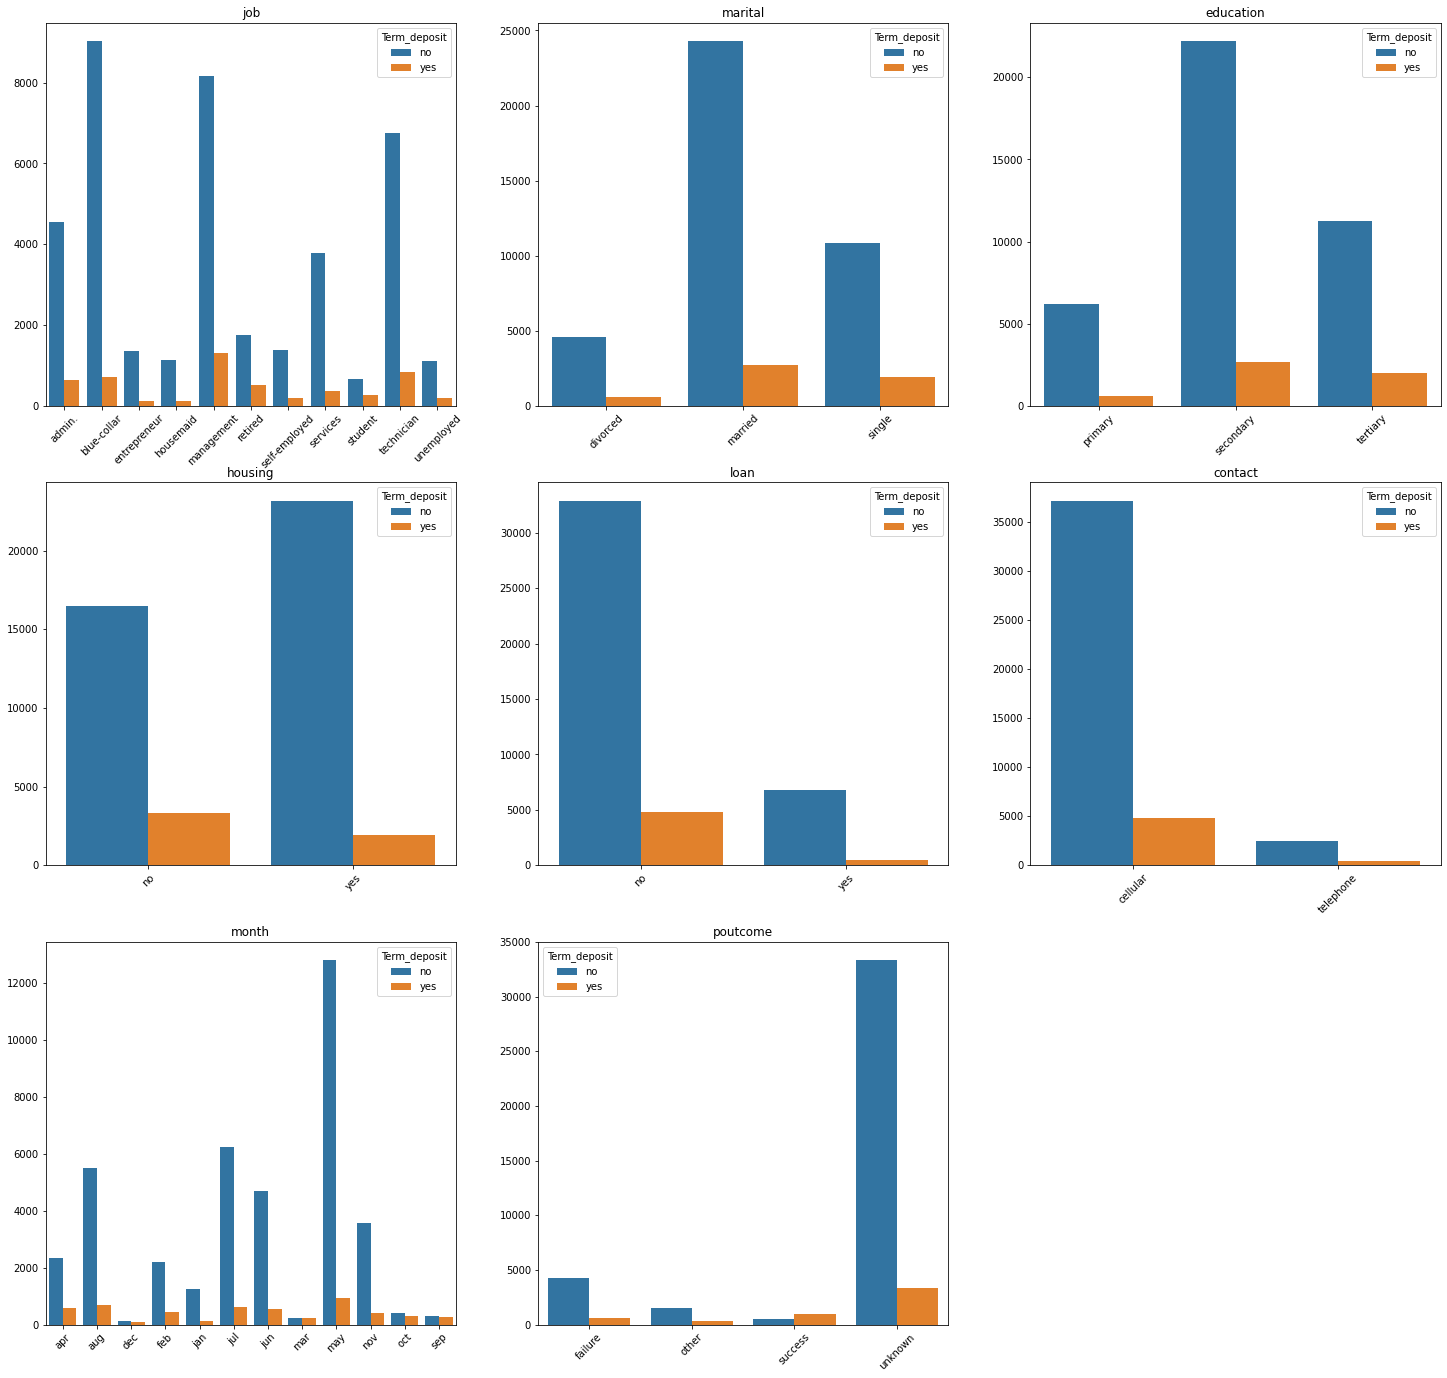

In [ ]:
cat_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month','poutcome']
plt.figure(figsize=(25,100), facecolor ='white')
counter = 1
for i in cat_columns:                                               # using for loop and subplot to draw multiple graphs
  ax = plt.subplot(12,3,counter)
  sns.countplot(data=d, x = d[i], hue='Term_deposit')               # Drawing count plot using seaborn library.   
  plt.xlabel('')
  plt.xticks(rotation=45)                                            # Rotating the colmn names in the graph by 45 deg
  plt.ylabel('')
  plt.title(i)                                                       # Giving the title for the graphs
  counter += 1
plt.show()

From the above we can infer that:
> Users with management job have higher count of term deposit, where people with blue colar job have very high count of no term deposit.

> Married users have higher count of term deposit and also have higher count of no term deposit compaired to single and divorced users.

> Users who's level of education is secondary have higher count of term deposit and also have higher count of no term deposit compaired to primary and tertiary level of educated users.

> Users who have housing loan seems to be not interested much on term deposit.

> Users with no personal loan have opted term deposit slight high in number compared to users having personal loan.

> As the count of contact through cellular is more more number of users have opted to term deposit compared to telepone users but even the ratio of interest in term deposit is very less.

> In month of Aug, Jul and May client show much interest to deposit

> If pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit.


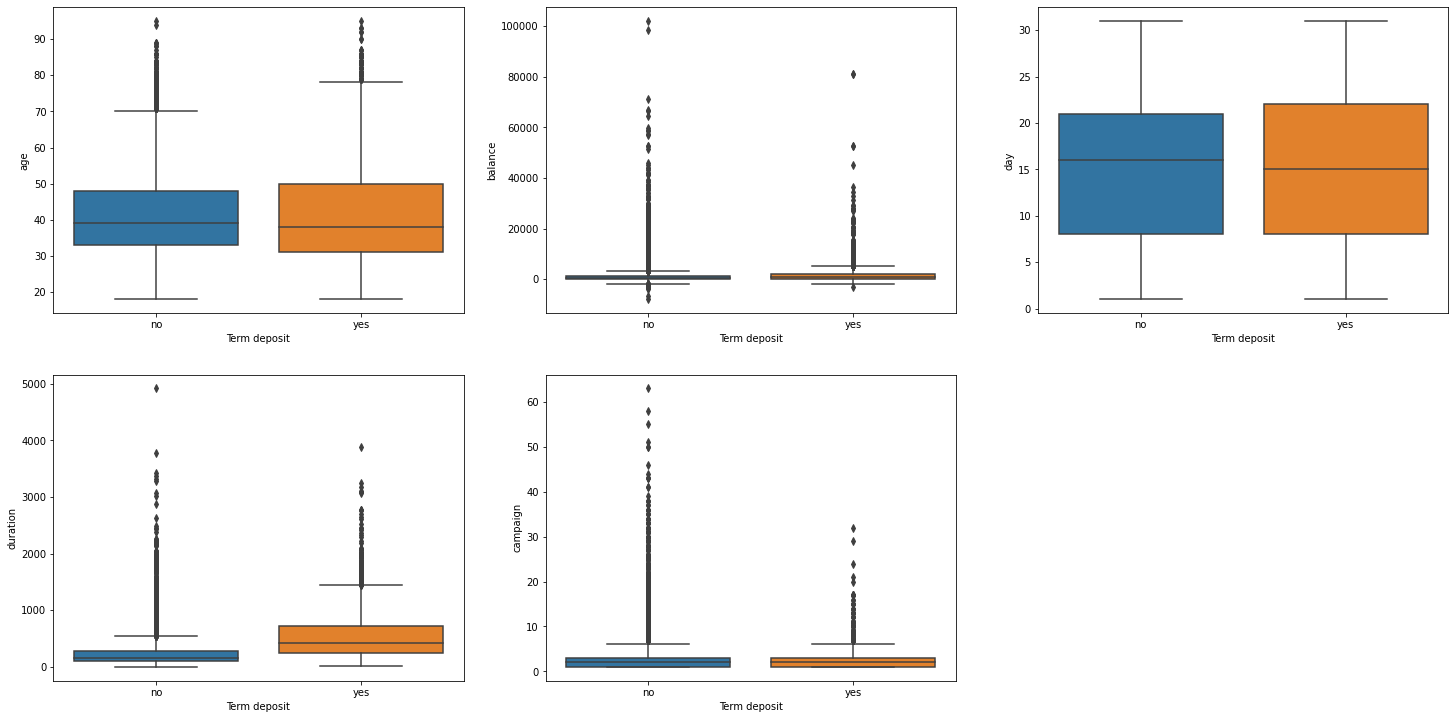

In [ ]:
plt.figure(figsize=(25,80), facecolor='white')
plotnumber =1
for i in num_columns:                                            # using for loop and subplot to draw multiple graphs
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Term_deposit", y= d[i], data=d)                 # Drawing box plot using seaborn library.
    plt.xlabel("Term deposit")                                     # Using xlabel to give label to the graph
    plotnumber+=1
plt.show()

From the above plots we can infer that:
> Users with age of around 37 have higher count of term deposit.

> When Duration of discussion is high count of term deposit is also high.

> Term Deposits are high for dates of around 15th.

###Now Drawing pairplot for attributes in the dataset:

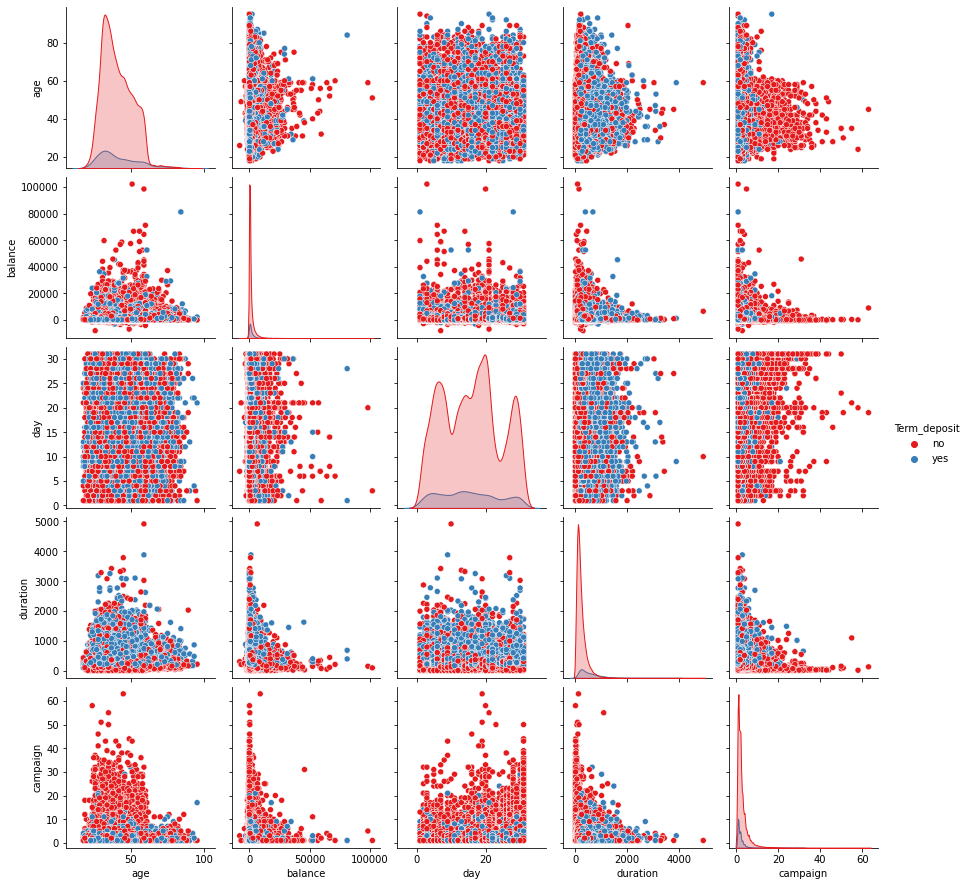

In [ ]:
sns.pairplot(d, hue="Term_deposit", palette="Set1")        #drawing pair plot using pairplot from seaborn   
plt.show()

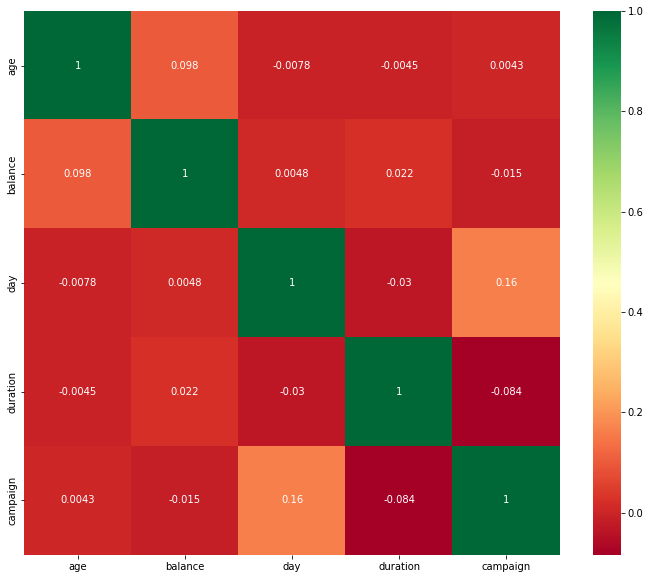

In [ ]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(d.corr(), annot=True,cmap ='RdYlGn')

A pairwise plot has been used to create pairwise relationships in a dataset.From the above two plot we can see that:
> There is no obvious relationship between age and balance but we can say that balance is high for age group of around 40

> From the above correlation plot we can clearly see that there is no relation between the columns

In [ ]:
d['job'] = d.job.map({'admin':0, 'blue-collar':1, 'entrepreneur':2,'housemaid':3,'management':4,'retired':5,'self-employed':6,'services':7,'student':8,'technician':9,'unemployed':10})   #mapping catogerical data with numerical data
d['marital'] = d.marital.map({'married':0, 'single':1, 'divorced':2})                                 #mapping catogerical data with numerical data for further analysis
d['education'] = d.education.map({'primary':0, 'secondary':1, 'tertiary':2})
d['housing'] = d.housing.map({'no':0, 'yes':1})  
d['loan'] = d.loan.map({'no':0, 'yes':1})
d['month'] = d.month.map({'apr':0, 'aug':1, 'dec':2,'feb':3,'jan':4,'jul':5,'jun':6,'mar':7,'may':8,'nov':9,'oct':10, 'sep':11})
d['contact'] = d.contact.map({'cellular':0, 'telephone':1})
d['poutcome'] = d.poutcome.map({'success':0, 'other':1, 'failure':2,'unknown':3})
d['Term_deposit'] = d.Term_deposit.map({'no':0, 'yes':1})
d.head(10)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,Term_deposit
0,30,10.0,0,0,1787,0,0,0,19,10,79,1,3,0
1,33,7.0,0,1,4789,1,1,0,11,8,220,1,2,0
2,35,4.0,1,2,1350,1,0,0,16,0,185,1,2,0
3,30,4.0,0,2,1476,1,1,0,3,6,199,4,3,0
4,59,1.0,0,1,0,1,0,0,5,8,226,1,3,0
5,35,4.0,1,2,747,0,0,0,23,3,141,2,2,0
6,36,6.0,0,2,307,1,0,0,14,8,341,1,1,0
7,39,9.0,0,1,147,1,0,0,6,8,151,2,3,0
8,41,2.0,0,2,221,1,0,0,14,8,57,2,3,0
9,43,7.0,0,0,-88,1,1,0,17,0,313,1,2,0


In [ ]:
scaler = preprocessing.MinMaxScaler()           #using normalization as the data is not normaly distributed
G = d.columns                                   # performing preprocessing par
H = scaler.fit_transform(d)
s = pd.DataFrame(H, columns=G)
s.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,Term_deposit
0,0.155844,1.000000,0.0,0.0,0.089027,0.0,0.0,0.0,0.600000,0.909091,0.016063,0.000000,1.000000,0.0
1,0.194805,0.666667,0.0,0.5,0.116282,1.0,1.0,0.0,0.333333,0.727273,0.044734,0.000000,0.666667,0.0
2,0.220779,0.333333,0.5,1.0,0.085060,1.0,0.0,0.0,0.500000,0.000000,0.037617,0.000000,0.666667,0.0
3,0.155844,0.333333,0.0,1.0,0.086204,1.0,1.0,0.0,0.066667,0.545455,0.040464,0.048387,1.000000,0.0
4,0.532468,0.000000,0.0,0.5,0.072803,1.0,0.0,0.0,0.133333,0.727273,0.045954,0.000000,1.000000,0.0


As the range of all the columns are different and varying highily it will be difficult to build a ML model hence we are bringing them to a normalized range so that we can insert the Data in ML models. Here we are using normalization as stasticaly the data is not normaly distributed.

In [ ]:
s = np.nan_to_num(s)
from sklearn.decomposition import PCA
pca=PCA()
fit=pca.fit(s)

Using PCA tool to identify main axes of variance within a data set and also it allows for easy data exploration to understand the key variables in the data and spot outliers

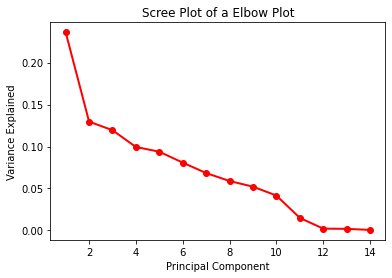

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='red') #plotting elbow plot to observe kink
plt.title('Scree Plot of a Elbow Plot')   #labeling the title, X and Y axis
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

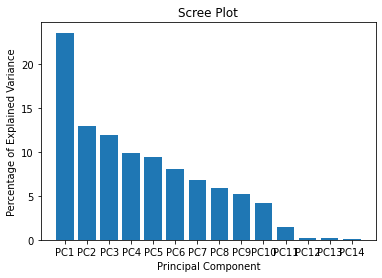

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

From the above two graphs we can infer the kink at PC2 as there is a large change in the varience compared to other components.

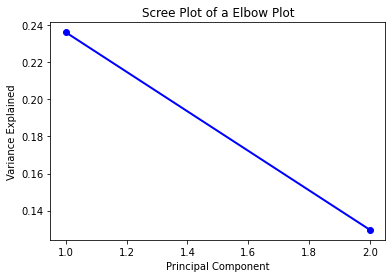

In [ ]:
pca=PCA(n_components= 2)
fit=pca.fit(s)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot of a Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca.explained_variance_ratio_ #viewing the explained variance ratio

array([0.23607668, 0.12962701])

Getting the explained variance ratio as it gives the percentage of variance that is attributed by each of the selected components

###Conclusion:
In this project we have taken all the necessary steps and got the following insights.
> Performed all the necessary data cleaning steps and delt with missing values.

>Transformed the skewed data using sqrt transform and boxcox.

> Handeled outliers by taking necessary steps.

>We saw that the the month of highest level of marketing activity was the month of May

> In month of Aug, Jul and May client show much interest to deposit

> As we have observed pdays that is number of days that passed by after the client was last contacted from a previous campaign is concentrated more on null or zero so care should be taken for reapproach

> Even Previous that is number of contacts performed before this campaign and for this client is also cocentrated more on zero count so care should be taken for reapproach

> Users with management job have higher count of term deposit, where people with blue colar job have very high count of no term deposit.

>Users with no personal loan have opted term deposit slight high in number compared to users having personal loan.

>Users with age of around 37 have higher count of term deposit.

>  When Duration of discussion is high count of term deposit is also high.

## Part 2 - SQL

In [ ]:
!pip install pymysql              #installing pymysql
import pymysql
from sqlalchemy import create_engine         # importing create engine
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host='localhost', db='bank', user='root', pw='12345'))      #creating engine using host and db
d.to_sql('bank', engine, index=False)                                # getting the dataset to sql database using the above engine created

In [ ]:
conn = pymysql.connect(host='localhost',user='root',password='12345',db='bank')              # connecting to the database using connect from pymysql

Write an SQL query to identify the age group which is taking more loan and then calculate the sum of all of the balances of it?

In [ ]:
cur = conn.cursor()                #Connecting the cursor using cur variable
str1 = "select age,count(age) from bank where housing = 'yes' and loan = 'yes' group by age order by count(age)"           #using select statemnt to get the required attributes and using where condition to go according to the condition given in question, using group by to group the result by age           
str2 = "select age from bank where housing = 'yes' and loan = 'yes' group by age order by count(age) desc limit 0,1"
str3 = "select sum(balance) as Sum_of_Balance from bank where age in (select age from bank where housing = 'yes' and loan = 'yes') and balance in (select balance from bank where housing = 'yes' and loan = 'yes')"  #calculating the total balance of age group people who take more loans
cur.execute(str1)
out = cur.fetchall()
out = pd.DataFrame(out)
print(out)
cur.execute(str2)
out = cur.fetchall()
print("The age group taking more loan is",out)
cur.execute(str3)
out = cur.fetchall()
print("sum of all of the balances of that group is",out)

     0    1
0   20    2
1   62    2
2   21    5
3   22    5
4   61    8
5   23   17
6   60   29
7   24   32
8   58   41
9   25   44
10  59   45
11  57   48
12  56   62
13  55   65
14  54   67
15  53   76
16  50   81
17  26   85
18  52   90
19  27   90
20  48   92
21  51   96
22  49  103
23  47  110
24  28  115
25  46  116
26  43  118
27  45  121
28  42  125
29  44  126
30  29  131
31  41  134
32  38  139
33  39  159
34  40  166
35  37  176
36  30  189
37  36  191
38  35  196
39  31  198
40  34  211
41  33  221
42  32  238
The age group taking more loan is ((32,),)
sum of all of the balances of that group is ((Decimal('13137470'),),)


Write an SQL query to calculate for each record if a loan has been taken less than 100, then  calculate the fine of 15% of the current balance and create a temp table and     then add the amount for each month from that temp table? 

In [ ]:
# Considering the given question is incomplete or inaccurate, we are assuming the question as 'Calculate for each record if a loan has been taken with duration less than 100, and so on...'

str1 = "select month_,balance from bank where loan = 'yes'and housing = 'yes' and duration < 100"    #getting month and balance using where clause for the assumed condition 
str2 = "create temporary table temporary_table (select month_, ABS(0.15*balance) as interest from bank where loan = 'yes'and housing = 'yes' and duration < 100)"  #creating a temporary table and aloting the interest amount with month to the table, using ABS to get positive values only
str3 = "select month_, sum(interest) from temporary_table group by month_"       #selcting month and totaling up the interest from temporary table
cur.execute(str1)                                             # Using execute to execute the query in SQL
out = cur.fetchall()                                          # Using the fetchall to fetch the result from SQL
out = pd.DataFrame(out)                                       # Creating the dataframe for the output
print('Getting the month and balance for duration less than 100 and loan has been taken',out)
cur.execute(str2)
cur.execute(str3)
out = cur.fetchall()
out = pd.DataFrame(out)
print("Getting the month and adding the total interest for each month",out)

Getting the month and balance for duration less than 100 and loan has been taken         0     1
0     jan   360
1     may   428
2     jul  -249
3     may   978
4     jul  5181
...   ...   ...
1021  jul   813
1022  jul   423
1023  aug    80
1024  sep   821
1025  oct   262

[1026 rows x 2 columns]
Getting the month and adding the total interest for each month       0         1
0   jan   1101.75
1   may  50406.15
2   jul  21435.90
3   jun  12655.95
4   aug   8239.95
5   apr  11360.25
6   nov  32815.50
7   sep    505.95
8   feb   7358.55
9   oct    188.85
10  dec      0.00
11  mar    756.30


Write an SQL query to calculate each age group along with each department's highest balance record? 

In [ ]:
str1 = "select age, job, balance from bank where balance in (select max(balance) from bank group by job) order by age;"   #Getting the highest balance from each department(job) with age group
cur.execute(str1)                                               # Using execute to execute the query in SQL
out = cur.fetchall()                                                # Using the fetchall to fetch the result from SQL
out = pd.DataFrame(out)                                          # Creating the dataframe for the output
print(out)

     0              1       2
0   27        student   24025
1   32   entrepreneur   59649
2   39     technician   45248
3   50       services   57435
4   51     management  102127
5   52    blue-collar   66653
6   59      housemaid   45141
7   59         admin.   64343
8   59     unemployed   44134
9   61  self-employed   52587
10  61  self-employed   52587
11  84        retired   81204
12  84        retired   81204


Write an SQL query to find the secondary highest education, where duration is more than 150. The query should contain only married people, and then calculate the interest amount? (Formula interest => balance*15%). 

In [ ]:
str1 = "select count(education) as num_of_secondary_edu from bank where education = 'secondary' and duration > 150 and marital = 'married';"    #Getting the secondary education count using where clause
str2 = "select sum(balance * 0.15) as sum_of_interest from bank where education = 'secondary' and duration > 150 and marital = 'married'"  # Calculating only interest amount as mentioned in the question
cur.execute(str1)                                                   # Using execute to execute the query in SQL
out = cur.fetchall()                                                   # Using the fetchall to fetch the result from SQL
print("Number of Secondary highest education is", out)
cur.execute(str2)
out = cur.fetchall()
print("Total interest amount for all the secondary higest education who is married and duration is more than 150 is",out)

number of Secondary highest education is ((8765,),)
Total interest amount for all the secondary higest education who is married and duration is more than 150 is ((Decimal('1716247.05'),),)


Write an SQL query to find which profession has taken more loan along with age?

In [ ]:
str1 = "select age, job, count(job) as no_of_loan from bank where housing = 'yes' and loan = 'yes' group by job order by count(job)"    # Getting the age and profession with where condition who has taken more loan with age
str2 = "select age, job, count(job) as no_of_loan from bank where housing = 'yes' and loan = 'yes' group by job order by count(job) desc limit 0,1"
cur.execute(str1)                                        # Using execute to execute the query in SQL
out = cur.fetchall()
out = pd.DataFrame(out)                              # Creating the dataframe for the output
print(out)
cur.execute(str2)
out = cur.fetchall()
print("The profession which has taken more loan along with age is ",out)

     0              1     2
0   27        student     4
1   54      housemaid    60
2   45     unemployed    63
3   36        retired   101
4   32  self-employed   130
5   32   entrepreneur   209
6   33       services   539
7   28         admin.   604
8   30     management   706
9   54     technician   816
10  31    blue-collar  1133
The profession which has taken more loan along with age is  ((31, 'blue-collar', 1133),)


Write an SQL query to calculate each month's total balance and then calculate in which month the highest amount of transaction was performed?

In [ ]:
str1 = "select month_, sum(balance) as Total_Balance from bank group by month_"                 #Calculating total balance of each month using sum and group by function
str2 = "select month_, sum(balance) as Total_Balance from bank group by month_ order by Total_Balance desc limit 0,1"         #Getting the month with highest amount of transaction
cur.execute(str1)                                        # Using execute to execute the query in SQL
out = cur.fetchall()
out = pd.DataFrame(out)                                             # Creating the dataframe for the output
print(out)
cur.execute(str2)
out = cur.fetchall()
print("The month with highest amount of transaction performed is",out)

      0         1
0   oct   1674082
1   may  14220642
2   apr   4514930
3   jun   8435383
4   feb   3455075
5   aug   8781942
6   jan   1309870
7   jul   6169908
8   nov   9945557
9   sep   1119864
10  mar    975317
11  dec    476673
The month with highest amount of transaction performed is (('may', Decimal('14220642')),)
